In [2]:
from scipy.signal.signaltools import wiener
import numpy as np
import matplotlib.pyplot as plt
import pyaudio
import wave
from pydub import AudioSegment
import scipy
from scipy.io import wavfile #audio i/o
from IPython.display import Audio #listening to audio
import thinkdsp
import thinkstats2
%matplotlib inline

In [19]:
# Implementation of Wiener filter
def solveWienerCoeff(w, s):
    '''
    w and s are the thinkdsp.Wave variables
    w - The recevied signal
    s - The source signal
    '''
    # Calculate the autocorrelation of w
    Rw = np.correlate(w.ys, w.ys, 'same')
    # Calculate the crosscorrelation of w and s
    Rws = np.correlate(w.ys, s.ys, 'same')
    # Obtain the Toeplitz matrix
    tmp = np.array([np.append(np.array([0]*(len(Rw)-i)), Rw[:i]) for i in range(len(Rw), 0, -1)])
    T = tmp + tmp.T - Rw[0]*np.eye(len(Rw))
    # Solve the linear equation
    return np.linalg.solve(T, Rws)

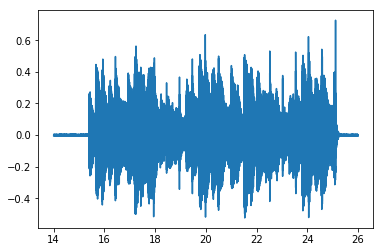

In [28]:
recv_music = thinkdsp.read_wave('Chirp_music_20cm.wav').segment(start = 14, duration = 12)
recv_music.plot()


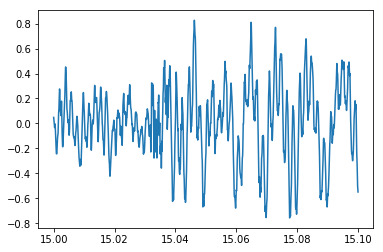

In [45]:
music = thinkdsp.read_wave('music.wav').segment(start = 15, duration = 0.1)
music.plot()

In [37]:
corr = np.correlate(recv_music.ys, music.ys, 'valid')
start = np.argmax(corr)
start

49133

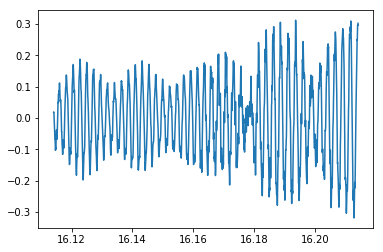

In [46]:
recv_music_seg = recv_music.segment(start = 15+start/44100, duration = 0.1 )
recv_music_seg.plot()

In [47]:
g = solveWienerCoeff(recv_music_seg, music)
G = np.fft.fft(g)

In [ ]:
xhat = np.convolve()

In [17]:
t = np.array([0, 1, 2, 3,4])
tmp = np.array([np.append(np.array([0]*(len(t)-i)), t[:i]) for i in range(len(t), 0, -1)])
T = tmp + tmp.T - t[0]*np.eye(len(t))
T

array([[0., 1., 2., 3., 4.],
       [1., 0., 1., 2., 3.],
       [2., 1., 0., 1., 2.],
       [3., 2., 1., 0., 1.],
       [4., 3., 2., 1., 0.]])

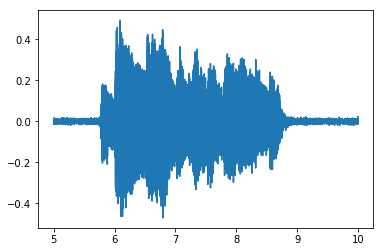

In [5]:
recv = thinkdsp.read_wave('Noise_music.wav').segment(start = 5, duration = 5)
recv.plot()
recv.make_audio()

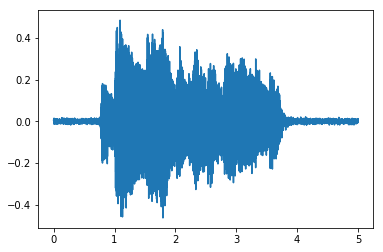

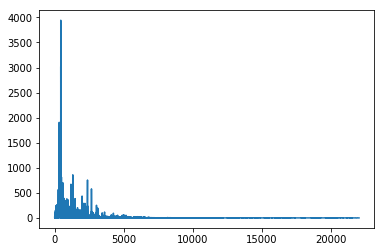

In [8]:
filtered = wiener(recv.ys)
filtered_wave = thinkdsp.Wave(filtered, framerate = 44100)
filtered_wave.plot()
filtered_wave.make_audio()
filtered_wave_spec = filtered_wave.make_spectrum()
plt.figure()
filtered_wave_spec.plot()